# Visualizing Time Series Data in Python

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Plotting Rolling Models and Aggregate Values Model

## Importing the necessary libraries

In [33]:
import pandas as pd #for data manipulation
import numpy as np  #for algebra
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns  #for data visualization
plt.style.use('fivethirtyeight')  #setting the plotting style as "fivethirtyeight"

## Importing & Loading the dataset

### Knowing the dataset

This time series dataset contains the CO2 measurements at the Mauna Loa Observatory, Hawaii between the years of 1958 and 2001.

### Importing the dataset

In [34]:
path = '/content/ch2_co2_levels.csv'

### Loading the dataset

In [35]:
df = pd.read_csv(path)

## Exploratory Data Analysis (EDA)

The `shape` attribute of `pandas DataFrame` stores the number of rows and columns as a tuple (number of rows, number of columns).

In [36]:
df.shape

(2284, 2)

`df.head()` - Displays the first 5 rows of the dataframe

In [37]:
df.head()

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


The `info()` method of `pandas DataFrame` displays information such as the number of rows and columns, the total memory usage, the data type of each column, and the number of non-NaN elements.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datestamp  2284 non-null   object 
 1   co2        2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


The `describe()` method is used for calculating some statistical data like percentile, mean and std of the numerical values of the dataframe.

In [39]:
df.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


Converting the dtype of `datestamp` column in the dataframe

In [41]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

Setting the `datestamp` column as the index of the dataframe

In [42]:
df = df.set_index('datestamp')

Rechecking the dataframe that our conversion works or not

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


## Dealing with Missing values

### Finding missing values

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp

`df.isnull()` is used to check NULL values in the dataframe.

It gives True for every NULL value and False for a NOT NULL values.

In [44]:
df.isnull()

,co2
datestamp,
1958-03-29,False
1958-04-05,False
1958-04-12,False
1958-04-19,False
1958-04-26,False
...,...
2001-12-01,False
2001-12-08,False
2001-12-15,False


`df.notnull()` is also used to check and manage NULL values in the dataframe.

It returns True for every NON-NULL value and False for a NULL value.

In [45]:
df.notnull()

,co2
datestamp,
1958-03-29,True
1958-04-05,True
1958-04-12,True
1958-04-19,True
1958-04-26,True
...,...
2001-12-01,True
2001-12-08,True
2001-12-15,True


`df.isnull().sum()` - Counts the number of null values in each column of the dataframe.

In [46]:
df.isnull().sum()

co2    59
dtype: int64

In [47]:
df.head(10)

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9


### Handling Missing Data

We are filling the missing values in our dataset with `bfill` (backfilling) method.

In this method, missing values are replaced using the next valid observation in the dataset.

In [48]:
df.fillna(method='bfill', inplace=True)

In [49]:
df.head(10)

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,317.5
1958-05-17,317.5
1958-05-24,317.9


## Plotting Rolling Models

### Moving Average Model

Computing the 52 weeks rolling mean of the co2_levels.

And then plotting the rolling mean.

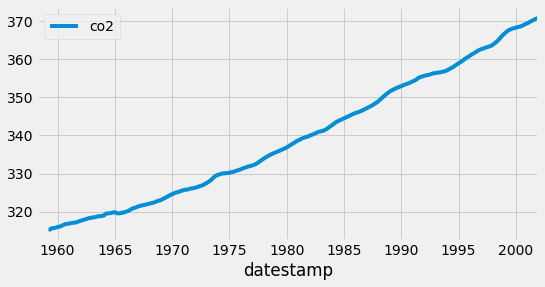

In [50]:
df1 = df.rolling(window=52).mean()

ax = df1.plot(figsize=(8,4))

ax.set_title('Moving Average Model')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.show()

### Rolling Mean and Variance

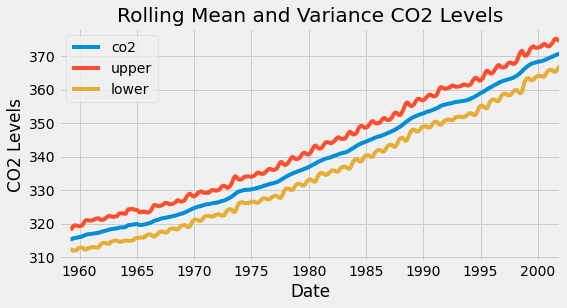

In [66]:
df1 = df.rolling(window=52).mean()
df2 = df.rolling(window=52).std()
df1['upper'] = df1['co2'] + (2 * df2['co2'])
df1['lower'] = df1['co2'] - (2 * df2['co2'])

df1.plot(figsize=(8,4))

plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.title('Rolling Mean and Variance CO2 Levels')
plt.show()

## Plotting Aggregate Value Models

### Displaying aggregated values

In [51]:
df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

Extracting the month in each dates of the dataframe

In [52]:
df.index.month

Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)

Extracting the year in each dates of the dataframe

In [53]:
df.index.year

Int64Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
            ...
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
           dtype='int64', name='datestamp', length=2284)

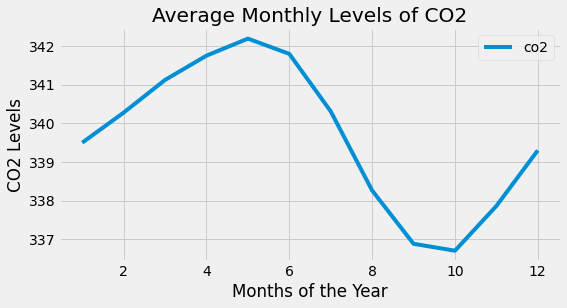

In [67]:
index_month = df.index.month  #Getting month for each dates in the index of dataframe

df_month = df.groupby(index_month).mean()  #Computing the mean CO2 levels for each month of the year

df_month.plot(figsize=(8,4))  #Plotting the mean CO2 levels for each month of the year

plt.title('Average Monthly Levels of CO2')
plt.xlabel('Months of the Year')
plt.ylabel("CO2 Levels")
plt.show() #show plot

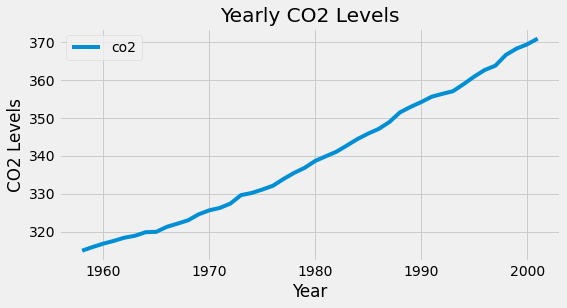

In [69]:
index_year = df.index.year  #Getting year for each dates in the index of dataframe

df_year = df.groupby(index_year).mean()  #Computing the mean CO2 levels for each year

df_year.plot(figsize=(8,4))  #Plotting the mean CO2 levels for each year

plt.title("Yearly CO2 Levels")
plt.xlabel("Year")
plt.ylabel("CO2 Levels")
plt.show()  #show plot

## Boxplots

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of our data. 

We can generate a boxplot by calling the `.boxplot()` method on a DataFrame.

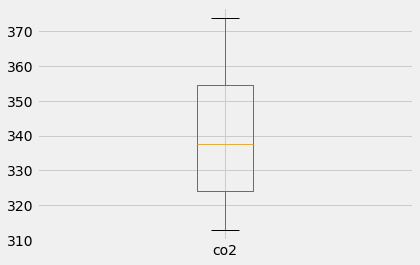

In [57]:
df.boxplot()  #Generates boxplot
plt.show()  #show plot

## Histograms

Another method to produce visual summaries is by leveraging histograms, which allows us to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread.

Here, we used the standard `.plot()` method but specified the kind argument to be `'hist'`. In addition, we also added the `bins=100` parameter, which specifies how many intervals (i.e bins) we should cut our data into.

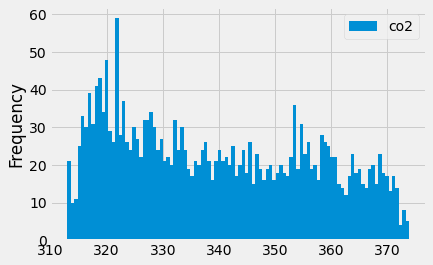

In [60]:
df.plot(kind='hist', bins=100)  #generates histogram with 100 bins
plt.show()  #show plot

## Density Plots

In practice, histograms can be a substandard method for assessing the distribution of our data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of our data.

The standard `.plot()` method is specified with the kind argument set to `'density'`. We also specified an additional parameter `linewidth`, which controls the width of the line to be plotted.

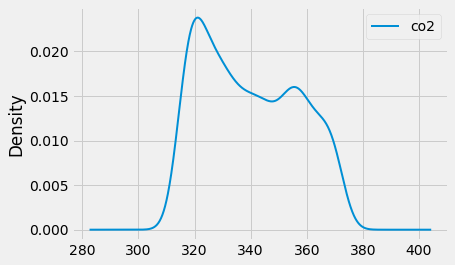

In [62]:
df.plot(kind='density', linewidth=2)  #generates density plot from the dataframe
plt.show()  #show plot

## Conclusion

In this jupyter notebook, we learnt a deeper understanding of our time series data by computing summary statistics and plotting aggregated values of our data.